# Séries temporais e tendências
## Séries temporais
 - Coleção de observações feitas sequencialmente
 - A ordem dos dados é fundamental

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_theme(style="darkgrid")

In [3]:
# Create some data
n_samples = 100
n_series = 4
rng = np.random.RandomState(0)
value = np.cumsum(rng.randn(n_samples, n_series), 0).T.reshape(-1)
serie = []
datetime_list = pd.date_range(end=datetime.now(), start=datetime.now()-timedelta(days=n_samples))
datetimes = []
for i in range(n_series):
    serie.extend([f"serie {i}"] * n_samples)
    datetimes.extend(datetime_list)


    
df = pd.DataFrame({
    "value": value,
    "serie": serie,
    "datetime": datetimes
})

In [4]:
df

,value,serie,datetime
0,1.764052,serie 0,2022-01-20 12:06:16.544333
1,3.631610,serie 0,2022-01-21 12:06:16.544333
2,3.528391,serie 0,2022-01-22 12:06:16.544333
3,4.289429,serie 0,2022-01-23 12:06:16.544333
4,5.783508,serie 0,2022-01-24 12:06:16.544333
...,...,...,...
395,15.765210,serie 3,2022-04-25 12:06:16.544333
396,14.293375,serie 3,2022-04-26 12:06:16.544333
397,14.070700,serie 3,2022-04-27 12:06:16.544333
398,13.309208,serie 3,2022-04-28 12:06:16.544333


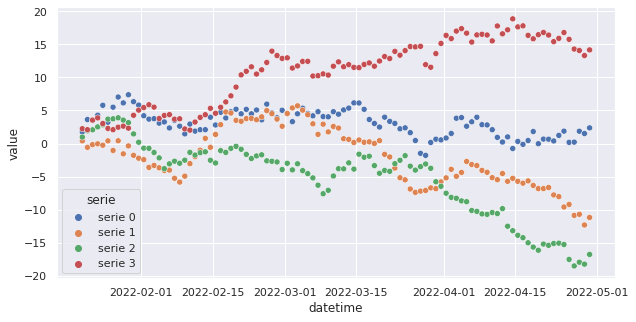

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, y="value", hue="serie", x="datetime")
plt.show()

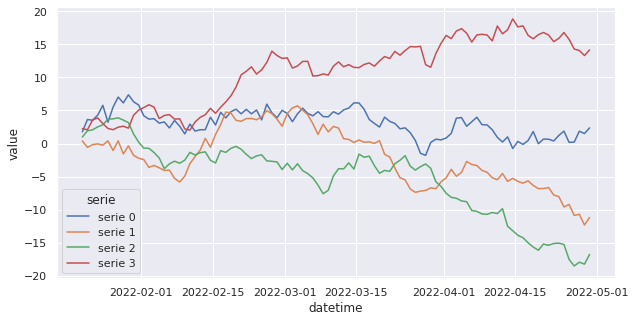

In [8]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, y="value", hue="serie", x="datetime")
# sns.scatterplot(data=df, y="value", hue="serie", x="datetime") # melhor sem
plt.show()

## Suavização

In [182]:
df_serie_0 = df.query("serie == 'serie 0'").drop(columns=["serie"], axis=0)

In [183]:
df_serie_0["avg7"] = df_serie_0.value.rolling(7).mean()

In [184]:
df_serie_0

,value,datetime,avg7
0,1.764052,2021-07-14 22:29:59.137997,NaN
1,3.631610,2021-07-15 22:29:59.137997,NaN
2,3.528391,2021-07-16 22:29:59.137997,NaN
3,4.289429,2021-07-17 22:29:59.137997,NaN
4,5.783508,2021-07-18 22:29:59.137997,NaN
...,...,...,...
95,0.176961,2021-10-17 22:29:59.137997,0.711481
96,0.215591,2021-10-18 22:29:59.137997,0.745840
97,1.863726,2021-10-19 22:29:59.137997,0.915867
98,1.510294,2021-10-20 22:29:59.137997,1.037645


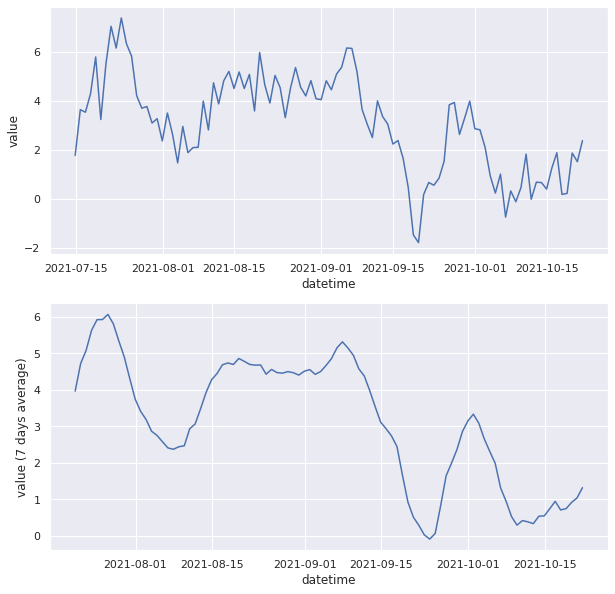

In [190]:
fig, axs = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)

sns.lineplot(data=df_serie_0, y="value", x="datetime", ax=axs[0])
sns.lineplot(data=df_serie_0, y="avg7", x="datetime", ax=axs[1])
axs[1].set_ylabel("value (7 days average)")
plt.show()